In [14]:
# Import libraries/modules
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
from scipy import stats

In [15]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM


In [16]:
# Set style for histogram
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
pl.rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [17]:
# Setup table for data display
# columnNames = ['Activity', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GryoZ', 'LineAccX', 'LineAccY', 'LineAccZ']
df = pd.read_csv('SD_ALL_Data.csv')
df.head()

,Activity,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearAccX,LinearAccY,LinearAccZ,Subject
0,WALKING,1.630000e+12,-0.437887,2.362912,8.090134,0.028404,-0.332759,-0.107509,-0.988754,0.034856,-0.999190,1
1,WALKING,1.630000e+12,0.516850,2.830111,7.343573,0.018784,-0.168594,-0.302217,-1.205701,-0.239560,2.372460,1
2,WALKING,1.630000e+12,-0.795015,3.601796,9.409775,0.122628,0.263122,0.075134,-0.252412,-0.837438,-0.975986,1
3,WALKING,1.630000e+12,-1.446461,3.064608,10.599008,0.036040,-0.091322,0.403465,0.488208,0.552766,-1.121081,1
4,WALKING,1.630000e+12,-0.793221,2.845066,8.049456,0.301911,0.005192,0.075898,0.028344,0.478232,1.499631,1


<AxesSubplot:title={'center':'Data points per activity'}>

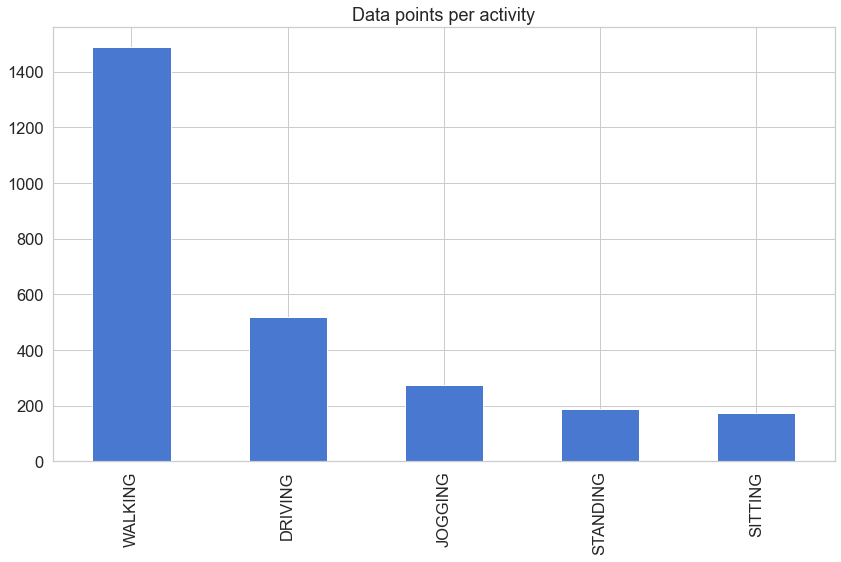

In [18]:
# Display histogram for activity volume
df['Activity'].value_counts().plot(kind='bar', title='Data points per activity')

In [19]:
# Create function to make line graph that displays each feature of an activity
def plot_activity(activity, df):
    data = df[df['Activity'] == activity][['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'LinearAccX', 'LinearAccY', 'LinearAccZ']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

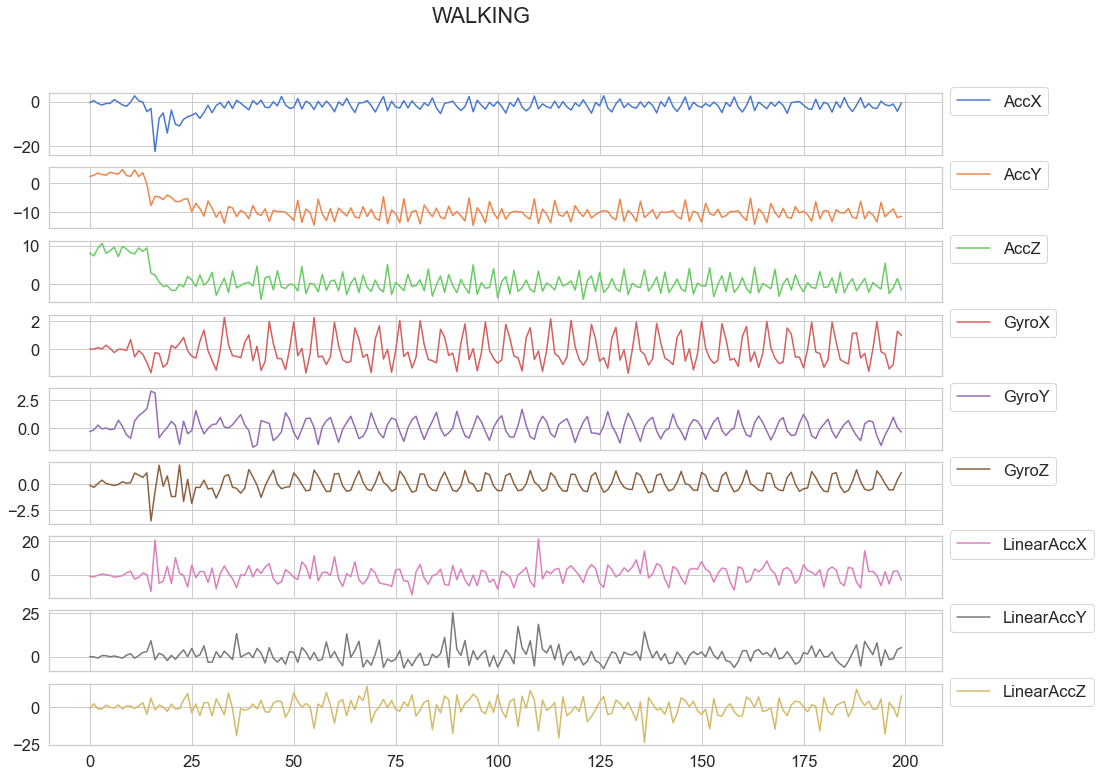

In [20]:
# Call function
plot_activity("WALKING", df)

In [21]:
# # Cut data up into different segments
# N_TIME_STEPS = 200
# N_FEATURES = 9
# step = 20
# segments = []
# labels = []
# for i in range(0, len(df) - N_TIME_STEPS, step):
#     accX_s = df[''].values[i: i + N_TIME_STEPS]
#     accY_s = df[''].values[i: i + N_TIME_STEPS]
#     accZ_s = df[''].values[i: i + N_TIME_STEPS]
#     gyroX_s = df[''].values[i: i + N_TIME_STEPS]
#     gyroY_s = df[''].values[i: i + N_TIME_STEPS]
#     gyroZ_s = df[''].values[i: i + N_TIME_STEPS]
#     lineX_s = df[''].values[i: i + N_TIME_STEPS]
#     lineY_s = df[''].values[i: i + N_TIME_STEPS]
#     lineZ_s = df[''].values[i: i + N_TIME_STEPS]
#     label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
#     segments.append([accX_s, accY_s, accZ_s, gyroX_s, gyroY_s, gyroZ_s, lineX_s,lineY_s, lineZ_s])
#     labels.append(label)
# np.array(segments).shape

In [22]:
# Convert class names into dummy characters
activity = df['Activity'].replace(to_replace=["DRIVING", "JOGGING", "SITTING", "STANDING", "WALKING"],
                          value=[0, 1, 2, 3, 4])

In [23]:
# Converted classes replace old class names
df.drop('Activity', axis=1, inplace=True)

df = pd.concat([df, activity], axis=1)
df.head()

,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,LinearAccX,LinearAccY,LinearAccZ,Subject,Activity
0,1.630000e+12,-0.437887,2.362912,8.090134,0.028404,-0.332759,-0.107509,-0.988754,0.034856,-0.999190,1,4
1,1.630000e+12,0.516850,2.830111,7.343573,0.018784,-0.168594,-0.302217,-1.205701,-0.239560,2.372460,1,4
2,1.630000e+12,-0.795015,3.601796,9.409775,0.122628,0.263122,0.075134,-0.252412,-0.837438,-0.975986,1,4
3,1.630000e+12,-1.446461,3.064608,10.599008,0.036040,-0.091322,0.403465,0.488208,0.552766,-1.121081,1,4
4,1.630000e+12,-0.793221,2.845066,8.049456,0.301911,0.005192,0.075898,0.028344,0.478232,1.499631,1,4


In [24]:
# Split the data up
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Activity',axis=1),
                                                    df['Activity'], test_size=0.30,
                                                    random_state=101)


In [27]:
print(X_test)

         Timestamp      AccX       AccY      AccZ     GyroX     GyroY  \
198   1.630000e+12 -4.302893 -11.842677  1.466800  1.280183  0.046883   
80    1.630000e+12 -1.829911  -9.376275 -0.322433 -0.558467  1.064707   
1026  1.630000e+12 -4.323831  -0.095713  8.770891  0.018784  0.016187   
2066  1.630000e+12 -0.078963  -7.164709 -1.304687  2.367491  0.735307   
4     1.630000e+12 -0.793221   2.845066  8.049456  0.301911  0.005192   
...            ...       ...        ...       ...       ...       ...   
2111  1.630000e+12 -1.853241  -7.817351 -1.301695 -0.441337  0.720494   
1745  1.630000e+12  5.719444 -13.728222 -0.645464  1.945549  0.902527   
2551  1.626220e+12 -1.207179  -6.678368 -3.419942  1.641805  1.839261   
2004  1.630000e+12  4.255037 -12.756138  1.590629 -1.122585 -0.811205   
1806  1.630000e+12  4.756931  -9.541380 -0.445663 -0.159889 -0.496619   

         GyroZ  LinearAccX  LinearAccY  LinearAccZ  Subject  
198   0.420568    2.340221    3.950972   -6.419034        1  

In [25]:
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 8, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	print(n_timesteps, n_features, n_outputs)
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, validation_data=(testX, testy))
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size)
	return accuracy

In [26]:
score = evaluate_model(X_train, y_train, X_test, y_test)

IndexError: tuple index out of range